# Lection8

## Deep Learning (CNN Computer Vision)



<img src="../img/cnn1.jpeg" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[CNN explainer](https://poloclub.github.io/cnn-explainer/)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [ ]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip --no-check-certificate

In [ ]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

main_dir="pizza_steak"


In [4]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 1 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (461, 512, 3)


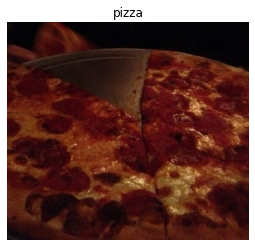

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
img

array([[[14,  7,  1],
        [17, 10,  4],
        [18, 11,  5],
        ...,
        [ 8,  3,  7],
        [ 8,  3,  7],
        [ 7,  2,  6]],

       [[14,  7,  1],
        [16,  9,  3],
        [17, 10,  4],
        ...,
        [ 8,  3,  7],
        [ 8,  3,  7],
        [ 7,  2,  6]],

       [[14,  7,  1],
        [16,  9,  3],
        [17, 10,  4],
        ...,
        [ 7,  2,  6],
        [ 8,  3,  7],
        [ 8,  3,  7]],

       ...,

       [[19,  9, 10],
        [22, 12, 13],
        [21, 11, 12],
        ...,
        [82, 29, 25],
        [79, 26, 20],
        [70, 17, 11]],

       [[20, 10, 11],
        [23, 13, 14],
        [21, 11, 12],
        ...,
        [76, 26, 19],
        [76, 26, 19],
        [68, 18, 11]],

       [[19,  9, 10],
        [22, 12, 13],
        [19,  9, 10],
        ...,
        [73, 23, 16],
        [75, 25, 18],
        [69, 19, 12]]], dtype=uint8)

In [11]:
img/255.

array([[[0.05490196, 0.02745098, 0.00392157],
        [0.06666667, 0.03921569, 0.01568627],
        [0.07058824, 0.04313725, 0.01960784],
        ...,
        [0.03137255, 0.01176471, 0.02745098],
        [0.03137255, 0.01176471, 0.02745098],
        [0.02745098, 0.00784314, 0.02352941]],

       [[0.05490196, 0.02745098, 0.00392157],
        [0.0627451 , 0.03529412, 0.01176471],
        [0.06666667, 0.03921569, 0.01568627],
        ...,
        [0.03137255, 0.01176471, 0.02745098],
        [0.03137255, 0.01176471, 0.02745098],
        [0.02745098, 0.00784314, 0.02352941]],

       [[0.05490196, 0.02745098, 0.00392157],
        [0.0627451 , 0.03529412, 0.01176471],
        [0.06666667, 0.03921569, 0.01568627],
        ...,
        [0.02745098, 0.00784314, 0.02352941],
        [0.03137255, 0.01176471, 0.02745098],
        [0.03137255, 0.01176471, 0.02745098]],

       ...,

       [[0.0745098 , 0.03529412, 0.03921569],
        [0.08627451, 0.04705882, 0.05098039],
        [0.08235294, 0

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/2
47/47 [==============================] - 78s 2s/step - loss: 0.5505 - accuracy: 0.7120 - val_loss: 0.4343 - val_accuracy: 0.7800
Epoch 2/2
47/47 [==============================] - 60s 1s/step - loss: 0.4185 - accuracy: 0.8127 - val_loss: 0.3377 - val_accuracy: 0.8520


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,10))

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.save('model1.h5')